<a href="https://colab.research.google.com/github/soumyabrataroy/StockPriceForecast/blob/main/Stock_Price_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Getting Stock Price

In [2]:
# Importing different libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

# used Reliance industries stock price 
data = yf.Ticker('RELIANCE.BO')

# get historical market data of stock from the begining
hist_stock = data.history(period="max")

Getting SENSEX data

In [3]:
# Sensex Ticker is '^BSESN' in Yahoo Finance website
data = yf.Ticker('^BSESN')

# get historical market data of stock
hist_sensex = data.history(period="max")

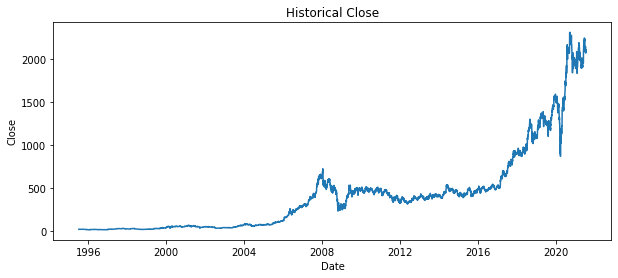

In [4]:
# Here I have visualizes the stock data for Reliance
plt.figure(figsize=(10,4))
plt.plot(hist_stock.index, hist_stock['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Historical Close");

**Stock Price Data**

In [5]:
hist_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-07-10,16.961103,16.993410,16.702647,16.767262,2988972750,0.0,0.0
1995-07-11,16.767262,16.767262,16.767262,16.767262,0,0.0,0.0
1995-07-12,16.896490,17.090332,16.864183,17.090332,3814050240,0.0,0.0
1995-07-13,17.122640,17.187254,17.025720,17.058027,3284069714,0.0,0.0
1995-07-14,17.090329,17.251863,17.025715,17.122635,2625803256,0.0,0.0


SENSEX Data

In [6]:
hist_sensex.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-01,4263.109863,4301.770020,4247.660156,4300.859863,0,0,0
1997-07-02,4302.959961,4395.310059,4295.399902,4333.899902,0,0,0
1997-07-03,4335.790039,4393.290039,4299.970215,4323.459961,0,0,0
1997-07-04,4332.700195,4347.589844,4300.580078,4323.819824,0,0,0
1997-07-07,4326.810059,4391.009766,4289.490234,4291.450195,0,0,0


Create Merged Data

In [7]:
# for simplicity, took only Stock 'Close' and 'Volume' data
stock_close = hist_stock[['Close','Volume']]

# for simplicity, took only Sensex 'Close' and 'Volume' data
sensex_close = hist_sensex[['Close','Volume']]

#Inner Join the above two data tables
merged_data = pd.merge(stock_close, sensex_close , on =None, how ='inner', left_index=True, right_index=True, suffixes=('_stock', '_sensex'))

**Getting only Stock close and sensex data together**

In [8]:
data = merged_data[['Close_stock','Close_sensex']]

In [9]:
# Null value check
data.isnull().sum()

Close_stock     0
Close_sensex    0
dtype: int64

200 Days Moving Average

In [10]:
data.insert(loc=1,column='200_MA_stock', value = data['Close_stock'].rolling(200).mean())

In [11]:
data.head()

,Close_stock,200_MA_stock,Close_sensex
Date,,,
1997-07-01,25.414921,NaN,4300.859863
1997-07-02,25.346138,NaN,4333.899902
1997-07-03,25.002228,NaN,4323.459961
1997-07-04,24.572340,NaN,4323.819824
1997-07-07,24.881859,NaN,4291.450195


Creating the RSI indicator

In [12]:
change = data['Close_stock'].diff(1)


is_gain, is_loss = change > 0, change < 0
gain, loss = change, -change


gain[is_loss] = 0
loss[is_gain] = 0


gain.name = 'gain'
loss.name = 'loss'


n = 14
avg_gain = change * np.nan
avg_loss = change * np.nan


avg_gain[n] = gain[:n+1].mean()
avg_loss[n] = loss[:n+1].mean()


avg_gain.name = 'avg_gain'
avg_loss.name = 'avg_loss'


avg_df = pd.concat([gain, loss, avg_gain, avg_loss], axis=1)
print(avg_df.iloc[:16,:])

                gain      loss  avg_gain  avg_loss
Date                                              
1997-07-01       NaN       NaN       NaN       NaN
1997-07-02  0.000000  0.068783       NaN       NaN
1997-07-03  0.000000  0.343910       NaN       NaN
1997-07-04  0.000000  0.429888       NaN       NaN
1997-07-07  0.309519  0.000000       NaN       NaN
1997-07-08  0.017199  0.000000       NaN       NaN
1997-07-09  0.103170  0.000000       NaN       NaN
1997-07-10  0.000000  0.034393       NaN       NaN
1997-07-11  0.000000  0.464272       NaN       NaN
1997-07-14  0.000000  0.567455       NaN       NaN
1997-07-15  0.171955  0.000000       NaN       NaN
1997-07-16  0.000000  0.068779       NaN       NaN
1997-07-17  0.085972  0.000000       NaN       NaN
1997-07-18  0.000000  0.550257       NaN       NaN
1997-07-21  0.292328  0.000000   0.07001  0.180553
1997-07-22  0.000000  0.017199       NaN       NaN


In [13]:
period = n


# used (len(avg_df)-1) because if I use len(avg_df), the assigning value will be out of bound
for n in range(period,len(avg_df)-1):
    
    avg_df['avg_gain'][n+1] = (((avg_df['avg_gain'][n])*(period-1))+(avg_df['gain'][n+1]))/period
    avg_df['avg_loss'][n+1] = (((avg_df['avg_loss'][n])*(period-1))+(avg_df['loss'][n+1]))/period

In [14]:
avg_df.tail(10)

,gain,loss,avg_gain,avg_loss
Date,,,,
2021-07-05,20.699951,0.000000,12.083947,10.855220
2021-07-06,0.000000,23.949951,11.220808,11.790558
2021-07-07,0.000000,15.800049,10.419322,12.076950
2021-07-08,0.000000,17.250000,9.675085,12.446454
2021-07-09,0.000000,19.699951,8.984007,12.964561
2021-07-12,11.250000,0.000000,9.145864,12.038521
2021-07-13,15.100098,0.000000,9.571166,11.178626
2021-07-14,0.000000,13.550049,8.887511,11.348014
2021-07-15,0.000000,2.750000,8.252689,10.733870


In [15]:
avg_df['Relative Strength'] = avg_df['avg_gain']/avg_df['avg_loss']
avg_df['RSI'] = avg_df['Relative Strength'].apply(lambda x: 100-(100/(x+1)))
avg_df

,gain,loss,avg_gain,avg_loss,Relative Strength,RSI
Date,,,,,,
1997-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-02,0.000000,0.068783,NaN,NaN,NaN,NaN
1997-07-03,0.000000,0.343910,NaN,NaN,NaN,NaN
1997-07-04,0.000000,0.429888,NaN,NaN,NaN,NaN
1997-07-07,0.309519,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-07-12,11.250000,0.000000,9.145864,12.038521,0.759717,43.172667
2021-07-13,15.100098,0.000000,9.571166,11.178626,0.856202,46.126564
2021-07-14,0.000000,13.550049,8.887511,11.348014,0.783178,43.920340


In [16]:
# quickly inserting the RSI values in the main data frame
data.insert(loc=2,column='RSI', value = avg_df['RSI'])
data

,Close_stock,200_MA_stock,RSI,Close_sensex
Date,,,,
1997-07-01,25.414921,NaN,NaN,4300.859863
1997-07-02,25.346138,NaN,NaN,4333.899902
1997-07-03,25.002228,NaN,NaN,4323.459961
1997-07-04,24.572340,NaN,NaN,4323.819824
1997-07-07,24.881859,NaN,NaN,4291.450195
...,...,...,...,...
2021-07-12,2084.449951,2043.309777,43.172667,52372.691406
2021-07-13,2099.550049,2042.347646,46.126564,52769.730469
2021-07-14,2086.000000,2041.287115,43.920340,52904.050781


In [17]:
#removing Null values from the data
data  = data.dropna()
data

,Close_stock,200_MA_stock,RSI,Close_sensex
Date,,,,
1998-04-29,26.095861,23.834225,52.388887,3970.280029
1998-04-30,26.315964,23.838730,53.785882,4006.810059
1998-05-04,26.824949,23.846124,56.932891,4135.810059
1998-05-05,26.714897,23.854688,56.044239,4147.290039
1998-05-06,26.839439,23.866023,56.864786,4069.790039
...,...,...,...,...
2021-07-12,2084.449951,2043.309777,43.172667,52372.691406
2021-07-13,2099.550049,2042.347646,46.126564,52769.730469
2021-07-14,2086.000000,2041.287115,43.920340,52904.050781


In [18]:
#rearranging the data for the model
new_data = data[['Close_sensex','RSI','200_MA_stock','Close_stock']]

In [19]:
new_data

,Close_sensex,RSI,200_MA_stock,Close_stock
Date,,,,
1998-04-29,3970.280029,52.388887,23.834225,26.095861
1998-04-30,4006.810059,53.785882,23.838730,26.315964
1998-05-04,4135.810059,56.932891,23.846124,26.824949
1998-05-05,4147.290039,56.044239,23.854688,26.714897
1998-05-06,4069.790039,56.864786,23.866023,26.839439
...,...,...,...,...
2021-07-12,52372.691406,43.172667,2043.309777,2084.449951
2021-07-13,52769.730469,46.126564,2042.347646,2099.550049
2021-07-14,52904.050781,43.920340,2041.287115,2086.000000


Training set

In [20]:
#getting the all the data except last 5 values
training_set = new_data.iloc[:-5,:].values
training_set.shape

(5708, 4)

In [21]:
training_set

array([[3.97028003e+03, 5.23888868e+01, 2.38342252e+01, 2.60958614e+01],
       [4.00681006e+03, 5.37858825e+01, 2.38387304e+01, 2.63159637e+01],
       [4.13581006e+03, 5.69328914e+01, 2.38461244e+01, 2.68249493e+01],
       ...,
       [5.30547617e+04, 4.63157714e+01, 2.04666618e+03, 2.11014990e+03],
       [5.25689414e+04, 4.37360391e+01, 2.04565585e+03, 2.09289990e+03],
       [5.23861914e+04, 4.09320884e+01, 2.04446951e+03, 2.07319995e+03]])

Test Set

In [22]:
#getting only last 5 values of the dataset
test_set = new_data.iloc[len(new_data)-5:,:].values
test_set.shape

(5, 4)

In [23]:
test_set

array([[5.23726914e+04, 4.31726674e+01, 2.04330978e+03, 2.08444995e+03],
       [5.27697305e+04, 4.61265636e+01, 2.04234765e+03, 2.09955005e+03],
       [5.29040508e+04, 4.39203404e+01, 2.04128712e+03, 2.08600000e+03],
       [5.31588516e+04, 4.34659553e+01, 2.04046378e+03, 2.08325000e+03],
       [5.31400586e+04, 4.93272277e+01, 2.04000249e+03, 2.11180005e+03]])

As per above to arrange the data as per 28 days time interval, I need to specify it below and also need to give total number of columns (except index) of the dataset

In [24]:
day = 28
column = 4
week = day

Feature Scaling

In [27]:
#using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
# scaling training set
training_set_scaled = sc.fit_transform(training_set)

sc_output = MinMaxScaler(feature_range = (0,1))
#scaling training Stock price only
output = sc_output.fit_transform(training_set[:,column-1].reshape(-1,1))

Arrenging X_train, Y_train

In [29]:
#arrenging the data as per the above logic [28 days data to predict the next day data]
tr = len(training_set)

X_train = []
y_train = []
for i in range(week, tr):
  X_train.append(training_set_scaled[i-week:i,0:column])
  y_train.append(training_set_scaled[i,column-1])
X_train,y_train = np.array(X_train), np.array(y_train)

In [30]:
X_train,y_train

(array([[[0.02715627, 0.50712331, 0.00305219, 0.00509949],
         [0.02788029, 0.52435604, 0.00305441, 0.0051951 ],
         [0.03043704, 0.56317617, 0.00305805, 0.0054162 ],
         ...,
         [0.01618503, 0.25935361, 0.0030702 , 0.00329266],
         [0.01720258, 0.2728816 , 0.00306115, 0.00334162],
         [0.01409761, 0.2143051 , 0.00305073, 0.00287649]],
 
        [[0.02788029, 0.52435604, 0.00305441, 0.0051951 ],
         [0.03043704, 0.56317617, 0.00305805, 0.0054162 ],
         [0.03066457, 0.55221414, 0.00306226, 0.0053684 ],
         ...,
         [0.01720258, 0.2728816 , 0.00306115, 0.00334162],
         [0.01409761, 0.2143051 , 0.00305073, 0.00287649],
         [0.01458022, 0.25811213, 0.00304071, 0.00303562]],
 
        [[0.03043704, 0.56317617, 0.00305805, 0.0054162 ],
         [0.03066457, 0.55221414, 0.00306226, 0.0053684 ],
         [0.02912854, 0.56233605, 0.00306784, 0.0054225 ],
         ...,
         [0.01409761, 0.2143051 , 0.00305073, 0.00287649],
        

Arrenging X test, y test

In [31]:
inputs = new_data.iloc[len(new_data)-5-week:, :]
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(week, len(inputs)):
  X_test.append(inputs[i-week:i,0:column])
  y_test.append(inputs[i,column-1])
X_test,y_test = np.array(X_test), np.array(y_test)
#X_test = np.array(X_test, dtype=object)
#X_test = np.asarray(X_test).astype('float32')

In [ ]:
#creating two dimentional y_test vector
y_test = y_test.reshape(-1,1)

In [44]:
X_test[0]

array([[0.97611159, 0.80049427, 0.99569606, 0.94693535],
       [0.98370156, 0.80703773, 0.99591606, 0.95037765],
       [0.98107784, 0.75665794, 0.99605483, 0.94230217],
       [0.98560588, 0.79090791, 0.99629949, 0.95819341],
       [0.9845566 , 0.75730055, 0.99652624, 0.95273757],
       [0.97793818, 0.6588424 , 0.99667508, 0.9354391 ],
       [0.98505008, 0.66885943, 0.996899  , 0.9388814 ],
       [0.98850453, 0.7132899 , 0.99714776, 0.95508444],
       [0.99002608, 0.74710599, 0.99744058, 0.96911549],
       [0.99441655, 0.75156853, 0.99783467, 0.97102679],
       [0.989044  , 0.65638046, 0.9981709 , 0.95449796],
       [0.98550315, 0.66148785, 0.99848164, 0.95619217],
       [0.98592176, 0.67433625, 0.99885025, 0.96031894],
       [0.99048054, 0.69135441, 0.99911516, 0.96577065],
       [0.99076298, 0.65916425, 0.99941323, 0.9607316 ],
       [0.98516125, 0.60332631, 0.99965027, 0.95165274],
       [0.99294888, 0.48661486, 0.99985083, 0.92917269],
       [0.99742893, 0.40009345,

Building and training the RNN

Importing the Keras library and packages

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

Initializing the RNN

In [35]:
regressor= Sequential()

Adding the first LSTM and some dropout regularization

In [36]:
regressor.add(LSTM(units= 100, return_sequences= True, input_shape = (week,column)))
regressor.add(Dropout(0.2))

Adding the second LSTM and some dropout regularization

In [37]:
regressor.add(LSTM(units= 100, return_sequences= True, input_shape = (week,column)))
regressor.add(Dropout(0.2))

Adding the second LSTM and some dropout regularization

In [38]:
regressor.add(LSTM(units= 100, return_sequences= True, input_shape = (week,column)))
regressor.add(Dropout(0.2))

Adding the output layer

In [39]:
regressor.add(Dense(units= 1))

Compiling the RNN

In [40]:
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

Defining the early stoppingto prevent overfitting

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience=10)

Fitting the RNN to the trainingset

In [ ]:
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(5680, 28, 4) (5680, 1) (5, 28, 4) (5, 1)


In [ ]:
y_train = y_train.reshape(-1,1)

In [41]:
regressor.fit(X_train, y_train, epochs=50,batch_size=32)

Epoch 1/50
178/178 [==============================] - 19s 75ms/step - loss: 0.0080
Epoch 2/50
178/178 [==============================] - 13s 74ms/step - loss: 0.0023
Epoch 3/50
178/178 [==============================] - 13s 75ms/step - loss: 0.0014
Epoch 4/50
178/178 [==============================] - 13s 75ms/step - loss: 0.0011
Epoch 5/50
178/178 [==============================] - 13s 75ms/step - loss: 0.0011
Epoch 6/50
178/178 [==============================] - 13s 75ms/step - loss: 9.4940e-04
Epoch 7/50
178/178 [==============================] - 13s 75ms/step - loss: 9.4355e-04
Epoch 8/50
178/178 [==============================] - 13s 75ms/step - loss: 8.7656e-04
Epoch 9/50
178/178 [==============================] - 13s 75ms/step - loss: 8.4770e-04
Epoch 10/50
178/178 [==============================] - 13s 75ms/step - loss: 8.1479e-04
Epoch 11/50
178/178 [==============================] - 13s 75ms/step - loss: 8.3737e-04
Epoch 12/50
178/178 [==============================] - 13s 74

In [ ]:
regressor.fit(X_train, y_train, epochs=1000,validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
178/178 [==============================] - 11s 34ms/step - loss: 0.0411 - val_loss: 0.2108
Epoch 2/1000
178/178 [==============================] - 5s 28ms/step - loss: 0.0246 - val_loss: 0.1387
Epoch 3/1000
178/178 [==============================] - 5s 27ms/step - loss: 0.0223 - val_loss: 0.1185
Epoch 4/1000
178/178 [==============================] - 5s 28ms/step - loss: 0.0215 - val_loss: 0.1092
Epoch 5/1000
178/178 [==============================] - 5s 27ms/step - loss: 0.0206 - val_loss: 0.0993
Epoch 6/1000
178/178 [==============================] - 5s 28ms/step - loss: 0.0198 - val_loss: 0.0884
Epoch 7/1000
178/178 [==============================] - 5s 27ms/step - loss: 0.0192 - val_loss: 0.0791
Epoch 8/1000
178/178 [==============================] - 5s 27ms/step - loss: 0.0192 - val_loss: 0.0785
Epoch 9/1000
178/178 [==============================] - 5s 28ms/step - loss: 0.0188 - val_loss: 0.0778
Epoch 10/1000
178/178 [==============================] - 5s 28ms/step - 

Plotting Model training loss and validation loss

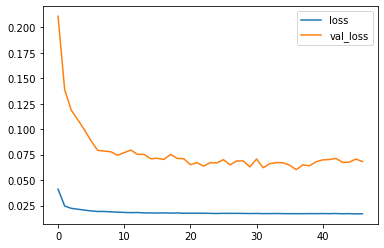

In [ ]:
loss_df = pd.DataFrame(regressor.history.history)
loss_df.plot()

Predicting the data

In [ ]:
X_train.shape

(5680, 28, 4)

In [45]:
y_pred = regressor.predict(X_test[0])
#y_pred = sc_output.inverse_transform(y_pred)
y_pred

ValueError: ignored

In [ ]:
y_test = test_set[:,7]
y_test=y_test.reshape(-1,1)

In [ ]:
np.concatenate((y_test,y_pred), axis =1)

Visualizing the data

In [ ]:
plt.plot(y_test, color = 'red', label='Real ASK')
plt.plot(y_pred, color = 'blue', label='predicted data')
plt.title('prediction comparison')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

Calculating the ME(Mean absolute error) and RMSE(Root meansquare error)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
ME = mean_absolute_error(y_test, y_pred)

In [ ]:
100 - ME/np.mean(y_test)*100

In [ ]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = MSE**.5
RMSE

In [ ]:
100-RMSE/np.mean(y_test)*100

In [ ]:
for i in range(0,len(y_test)):
  print(100-RMSE/y_test[i]*100)

Predicting the next value

In [ ]:
dataset_total = pd.read_excel(r'')

#getting only last three actual data to predict the forth one
inputs = dataset_total.iloc[len(dataset_total)-week:,1:column+1].values
inputs = sc.transform(inputs)
X_test=[]
X_test.append(inputs)
X_test = np.array(X_test)

predicted_data = regressor.predict(X_test)
predicted_data = sc_output.inverse_transform(predicted_data)

In [ ]:
predicted_data